In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import torch.nn as nn
import torch
from torch.nn import functional as F

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Reading the CSV file which contains the resume details and the respective labeled category
data=pd.read_csv('/content/drive/MyDrive/IIIT/Thesis/Resume/Resume2/Resume/Resume.csv')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
#Dropping the unnecessary columns from the dataset
data=data.drop(['ID','Resume_html'],axis=1)
data.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [ ]:
#These are all the various job categories present in the dataset
categories=np.sort(data['Category'].unique())
number_of_classes=len(categories)
print(categories)

['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


In [ ]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    return ' '.join(txt)

#Preprocessing the textual data
data['Resume_str'] = data['Resume_str'].apply(lambda w: preprocess(w))

In [ ]:
#Printing the data after preprocessing textual values and encoding the labels

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

data.head()

,Resume_str,Category
0,hr administrator marketing associate hr admini...,19
1,hr specialist us hr operations summary versati...,19
2,hr director summary years experience recruitin...,19
3,hr specialist summary dedicated driven dynamic...,19
4,hr manager skill highlights hr skills hr depar...,19


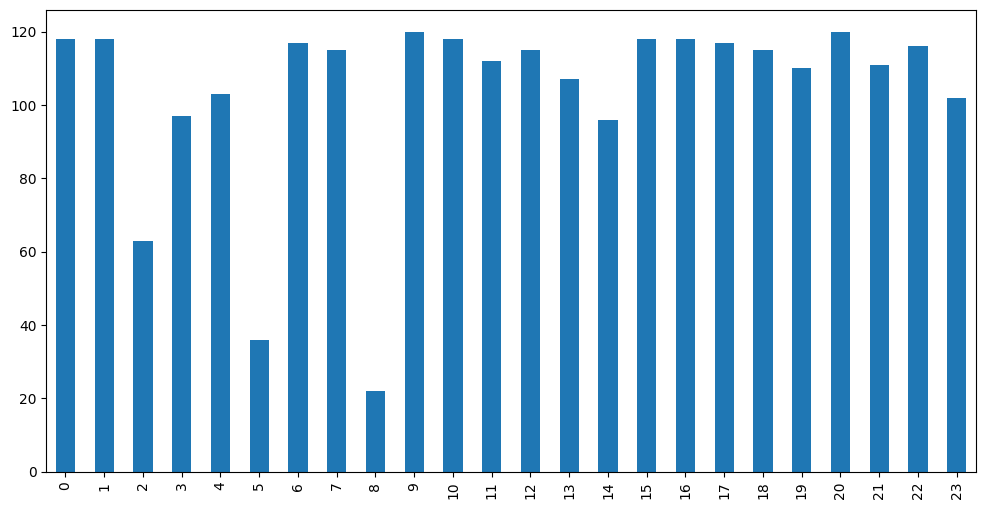

In [ ]:
#Distribution of different categories present in the dataset
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
requiredText = data['Resume_str'].values
requiredTarget = data['Category'].values
word_vectorizer = TfidfVectorizer(
    max_features=15000,
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print ("Feature completed .....")

Feature completed .....


In [ ]:
from sklearn.preprocessing import normalize
word_normalized = normalize(WordFeatures, norm='l1', axis=0)

In [ ]:
#Splitting the training and test dataset shape
from torch.utils.data import DataLoader
X_train,X_test,Y_train,Y_test = train_test_split(word_normalized,requiredTarget,random_state=421212, test_size=0.2,shuffle=True, stratify=requiredTarget)
X_train = X_train.todense()
X_test = X_test.todense()

In [ ]:
X_train.shape

(1987, 15000)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# fit model on training data
model = XGBClassifier()
model.fit(X_train, Y_train)

# make predictions for test data
y_pred_test = model.predict(X_test)
predictions_test = [round(value) for value in y_pred_test]
# evaluate predictions
accuracy_test = accuracy_score(Y_test, predictions_test)
print("Test Accuracy", (accuracy_test * 100.0))

Test Accuracy 74.24547283702213
Training Accuracy 100.0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost
KFold_model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(KFold_model, X_train, Y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:

class ANN(nn.Module):
  def __init__(self,input):
    super().__init__()
    self.fc1=nn.Linear(15000,2500)
    self.dropout1=torch.nn.Dropout(0.5)
    self.fc2=nn.Linear(2500,1250)
    self.fc3=nn.Linear(1250,600)
    self.dropout3=torch.nn.Dropout(0.5)
    self.fc4=nn.Linear(600,300)
    self.fc5=nn.Linear(300,150)
    self.fc6=nn.Linear(150,75)
    self.fc7=nn.Linear(75,35)
    self.fc8=nn.Linear(35,number_of_classes)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=self.dropout1(x)
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.dropout3(x)
    x=F.relu(self.fc4(x))
    x=F.relu(self.fc5(x))
    x=F.relu(self.fc6(x))
    x=F.relu(self.fc7(x))
    x=self.fc8(x)
    return x

In [ ]:
DL_model=ANN(input)
DL_model.state_dict()
DL_model.parameters

#Defining the loss function and the learning rate and the optimizing function
loss_function=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(DL_model.parameters(),lr=0.001)
# set up DataLoader for training set
Train_loader = DataLoader(list(zip(X_train, Y_train)), shuffle=True, batch_size=32)
Test_loader = DataLoader(list(zip(X_test, Y_test)), shuffle=False, batch_size=4)
#Got the best loss for lr=0.001 and batch size 32

In [ ]:
import math
epochs=20
train_batch_size=16
train_number_of_batches=np.ceil(1987/32)
validation_number_of_batches=np.ceil(497/4)
training_loss=[]
validation_loss=[]
best_validation_loss=math.inf
for i in range(epochs):
    total_train_loss=0
    correct=0
    DL_model.train()
    for X_batch, y_batch in Train_loader:
        optimizer.zero_grad()
        train_x=X_batch.clone().detach()                                        #Gradients are made zero before the epoch
        train_x=torch.squeeze(X_batch)
        train_x=train_x.type(torch.float32)
        train_output=DL_model.forward(train_x)
        train_y=y_batch.type(torch.LongTensor)
        loss_train=loss_function(train_output,train_y)
        loss_train.backward()                                                   #Gradients are calculated with respect to the parameters
        total_train_loss+=loss_train
        optimizer.step()
    #correct += (train_output == y_batch)
    #accuracy = 100 * correct / train_number_of_batches                         #Based on the gradients back-propogation is done
    train_loss_per_epoch=(total_train_loss/train_number_of_batches)
    training_loss.append(train_loss_per_epoch.cpu().detach().numpy())           #Saving the training loss in a list
    print('Epoch========>',i,'Train data Loss',train_loss_per_epoch)
    # print("Accuracy = {}".format(accuracy))

    with torch.no_grad():
      total_validation_loss=0
      for X_batch, y_batch in Test_loader:
        DL_model.eval()
        validation_x=X_batch.clone().detach()
        validation_x=torch.squeeze(X_batch)
        validation_x=validation_x.type(torch.float32)
        validation_output=DL_model.forward(validation_x)
        validation_y = torch.squeeze(y_batch.type(torch.LongTensor))
        loss_validation=loss_function(validation_output,validation_y)
        total_validation_loss+=loss_validation
      validation_loss_per_epoch=(total_validation_loss/validation_number_of_batches)
      validation_loss.append(validation_loss_per_epoch.cpu().detach().numpy())
      # if validation_loss_per_epoch<best_validation_loss:
      #   best_validation_loss=validation_loss_per_epoch
      #   torch.save(model,'best-model.pth')
      #   print('Model Saved')
      print('Validation data Loss',validation_loss_per_epoch)

Epoch========> 0 Train data Loss tensor(2.4897, grad_fn=<DivBackward0>)
Validation data Loss tensor(3.1215)
Epoch========> 1 Train data Loss tensor(2.3829, grad_fn=<DivBackward0>)
Validation data Loss tensor(3.2847)
Epoch========> 2 Train data Loss tensor(2.2682, grad_fn=<DivBackward0>)
Validation data Loss tensor(3.8386)
Epoch========> 3 Train data Loss tensor(2.0506, grad_fn=<DivBackward0>)
Validation data Loss tensor(3.8752)
Epoch========> 4 Train data Loss tensor(1.9141, grad_fn=<DivBackward0>)
Validation data Loss tensor(4.1165)
Epoch========> 5 Train data Loss tensor(1.7373, grad_fn=<DivBackward0>)
Validation data Loss tensor(5.4554)
Epoch========> 6 Train data Loss tensor(1.4911, grad_fn=<DivBackward0>)
Validation data Loss tensor(4.4096)
Epoch========> 7 Train data Loss tensor(1.3663, grad_fn=<DivBackward0>)
Validation data Loss tensor(4.8960)
Epoch========> 8 Train data Loss tensor(1.1985, grad_fn=<DivBackward0>)
Validation data Loss tensor(5.3219)
Epoch========> 9 Train data 

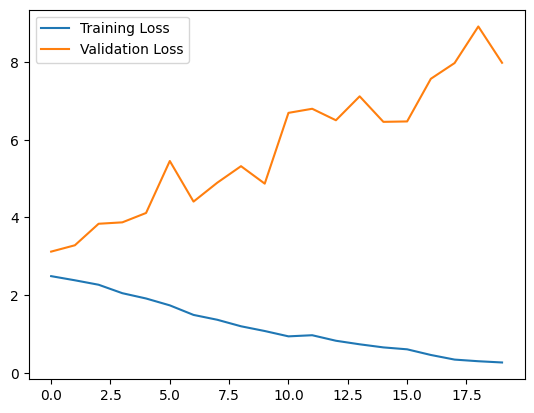

In [ ]:
fig, ax = plt.subplots()
line_up, = ax.plot(training_loss, label='Training Loss')
line_down, = ax.plot(validation_loss, label='Validation Loss')
ax.legend(handles=[line_up, line_down])